## Predicting Heart Disease with Machine Learning

This notebook lppoks into using various python based machine learning and data science libraries in an attempt to build a machine learning model capable of predicting whether or not someone has heart disease based on their medical attributes.

**The Following approach would be taken**
1. Problem definition 
2. Data
3. Evaluation
4. Features
5. Modelling 
6. Experimentation.

## 1. Problem Definition
> Given Clinical parameter about a patient, can we predict whether or not they have heart disease?

## 2. Data 
- The Original Data set was collected from the UCI machine learning repository: [UCI ML Repo](https://archive.ics.uci.edu/ml/datasets/heart+disease)
- There is also a version of it available on kaggle: [Kaggle](https://www.kaggle.com/datasets/redwankarimsony/heart-disease-data)

## 3. Evaluation
- if we can reach 90% accuracy at predicting whether or not a patient has heart disease during proof of concept, we'll pursue project

## 4. Features
- This gives information abour different features in the data

 
1. age - age in years 
2. sex - (1 = male; 0 = female) 
3. cp - chest pain type 
    * 0: Typical angina: chest pain related decrease blood supply to the heart
    * 1: Atypical angina: chest pain not related to heart
    * 2: Non-anginal pain: typically esophageal spasms (non heart related)
    * 3: Asymptomatic: chest pain not showing signs of disease
4. trestbps - resting blood pressure (in mm Hg on admission to the hospital)
    * anything above 130-140 is typically cause for concern
5. chol - serum cholestoral in mg/dl 
    * serum = LDL + HDL + .2 * triglycerides
    * above 200 is cause for concern
6. fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false) 
    * '>126' mg/dL signals diabetes
7. restecg - resting electrocardiographic results
    * 0: Nothing to note
    * 1: ST-T Wave abnormality
        - can range from mild symptoms to severe problems
        - signals non-normal heart beat
    * 2: Possible or definite left ventricular hypertrophy
        - Enlarged heart's main pumping chamber
8. thalach - maximum heart rate achieved 
9. exang - exercise induced angina (1 = yes; 0 = no) 
10. oldpeak - ST depression induced by exercise relative to rest 
    * looks at stress of heart during excercise
    * unhealthy heart will stress more
11. slope - the slope of the peak exercise ST segment
    * 0: Upsloping: better heart rate with excercise (uncommon)
    * 1: Flatsloping: minimal change (typical healthy heart)
    * 2: Downslopins: signs of unhealthy heart
12. ca - number of major vessels (0-3) colored by flourosopy 
    * colored vessel means the doctor can see the blood passing through
    * the more blood movement the better (no clots)
13. thal - thalium stress result
    * 1,3: normal
    * 6: fixed defect: used to be defect but ok now
    * 7: reversable defect: no proper blood movement when excercising 
14. target - have disease or not (1=yes, 0=no) (= the predicted attribute)


## Preparing the tools 
- Using Numpy, Pandas, Matplotlib, Scikit-learn for Data Analysis and Manipulation

In [1]:
#import all the tools i need:

#Regular EDA(Exploratory Data Analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#we want our plots to appear in our notebooks
%matplotlib inline

#models from scikit-learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

#model evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

## Exploring our data:


In [2]:
df=pd.read_csv("heart-disease.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
df.shape

(303, 14)

### Data Exploration or EDA
The goal here is to find more about the data and become a subject matter expert on the data
1. what question(s) are we trying to solve 
2. What kind of data do we have and how do we treat different types
3. what is missing from the data and how do we deal with it
4. what are the outliers and why should we care about them
5. How can you add, change or remove features to get more out of your data


In [6]:
#lets find out how many of each classes we have for target
df["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

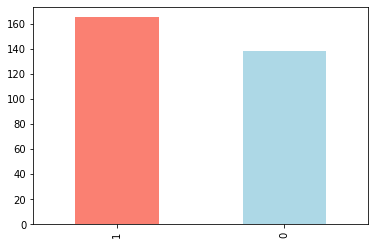

In [8]:
#lets plot it
df["target"].value_counts().plot(kind="bar", color=["salmon","lightblue"]);

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [10]:
#are there missing values
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [11]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


 ## Finding Patterns

**lets compare heart disease frequency with respect to sex**

In [12]:
df["sex"].value_counts()

1    207
0     96
Name: sex, dtype: int64

Here 0= female and 1= Male

In [14]:
pd.crosstab(df["target"],df["sex"])

sex,0,1
target,,
0,24,114
1,72,93


**we can see that females who don't have heart disease is 24 while those who have is 72. while males who have heart disease is 93 and those who do not have is 114**

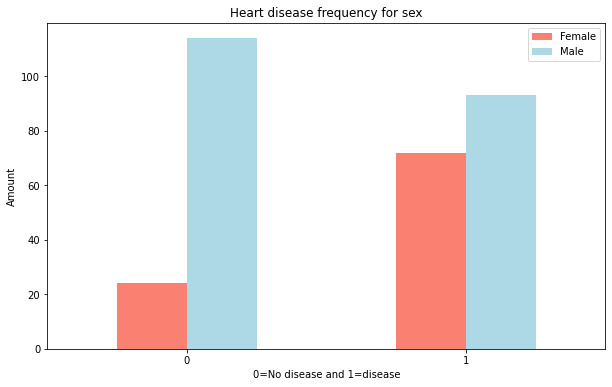

In [16]:
#lets visualize it
pd.crosstab(df["target"],df["sex"]).plot(kind="bar",
                                        figsize=(10,6),
                                        color=["salmon","lightblue"]);
plt.title("Heart disease frequency for sex")
plt.xlabel("0=No disease and 1=disease")
plt.ylabel("Amount")
plt.legend(["Female","Male"])
plt.xticks(rotation=0);

## Comparing Max Heart Rate (Thalach) to Age




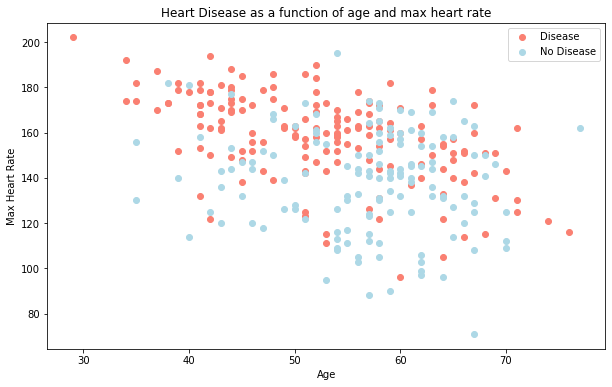

In [6]:
#create a simple fig bar
plt.figure(figsize=(10,6))

#plotting that of heart disease
plt.scatter(df.age[df.target==1],
            df.thalach[df.target==1],
            c="salmon")

#plotting no heart disease
plt.scatter(df.age[df.target==0],
            df.thalach[df.target==0],
            c="lightblue")

#Add some descriptions
plt.title("Heart Disease as a function of age and max heart rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease", "No Disease"]);

**We can infer that the younger a person is the higher their Max HeartRate**

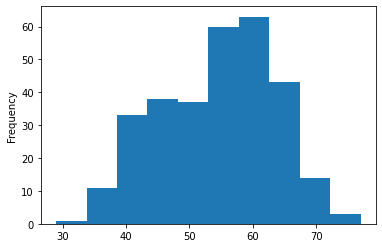

In [8]:
#lets check age distribution 
df["age"].plot.hist();

**Most of our age brackets fall within 55 to 65 yearsof age**

## Compare Chest Pain with Heart disease
we would like to check if chest pain contributes to the heart disease

cp - chest pain type
- 0 = Typical angina: chest pain related decrease blood supply to the heart
- 1: Atypical angina: chest pain not related to heart
- 2: Non-anginal pain: typically esophageal spasms (non heart related)
- 3: Asymptomatic: chest pain not showing signs of disease

In [9]:
pd.crosstab(df["cp"],df["target"])

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


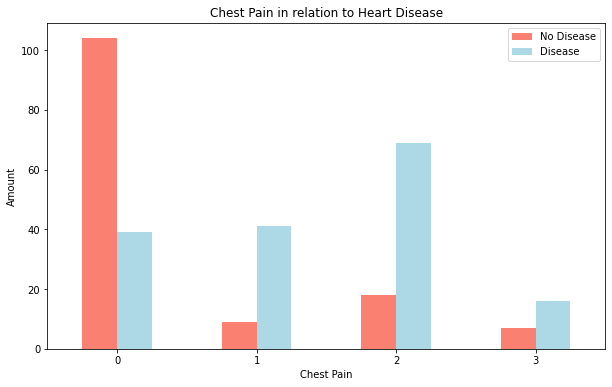

In [15]:
# Lets visualise it
pd.crosstab(df.cp,df.target).plot(kind="bar",
                                  figsize=(10,6),
                                 color=["salmon","lightblue"]);
#Add some info
plt.title("Chest Pain in relation to Heart Disease")
plt.xlabel("Chest Pain")
plt.ylabel("Amount")
plt.legend(["No Disease","Disease"])
plt.xticks(rotation=0);

### Finding pattterns with Correlation Matrix
Correlation Matrix is how each independent variable is related to one another

In [16]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


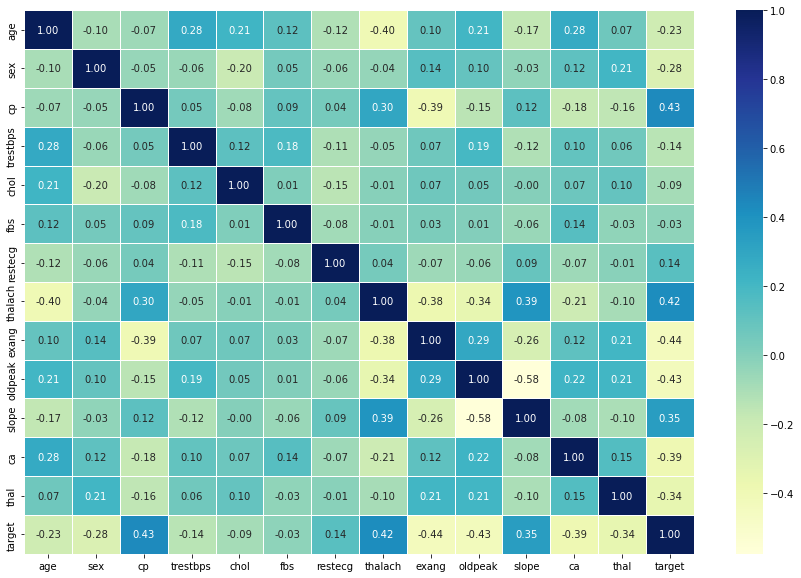

In [17]:
#lets visualise it with seaborns heat map
corr_matrix=df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr_matrix,
           annot=True,
           linewidths=0.5,
           fmt=".2f",
           cmap="YlGnBu");

## Modelling

In [18]:
#recall dataset
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
#split the data into X(independent variable) and y(dependent variable)
X=df.drop("target", axis=1)
y=df["target"]

In [20]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [21]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [9]:
#Split the data into train and test
np.random.seed(42)

X_train, X_test, y_train, y_test =train_test_split(X,y, test_size=0.2)

In [10]:
len(X_train), len(y_train)

(242, 242)

Now we have splitted the data, it is time to build Machine Learning models

we'll train it (find the patterns) on training set

we'll test it(use the patterns) on the test set


## Modelling

We are going to try out three different Machne Learning Models
- Random Forest Classifier
- Logistic Regression
- KNearest Neighbors

**Logistic Regression can also be used for machine learning modelling for the Classifier**

In [4]:
#lets create a dictionary and put in all the models
models={"LogisticRegression": LogisticRegression(),
        "KNN": KNeighborsClassifier(),
        "Random Forest": RandomForestClassifier()}

#create a function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    
    """
    fits and evaluate the machine learning model
    model: a dictionary of scikit learn ML models for the classifier
    X_train: training data
    X_test: testing data
    y_train: labels associated with training data
    y_test: labels associated with test data
    """

    #set up random seed
    np.random.seed(42)

    #set up empty dict to score model
    model_score= {}

    #loop through the models
    for name, model in models.items():
        #train the data
        model.fit(X_train,y_train)
        #evaluate the model and append it to the model_score
        model_score[name]=model.score(X_test,y_test)
    
    return model_score


In [11]:
model_score = fit_and_score(models=models,
                           X_train= X_train,
                           X_test=X_test,
                           y_train=y_train,
                           y_test=y_test)

model_score

C:\Users\TU7WRE\Desktop\Sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'LogisticRegression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

## Model Comparisons


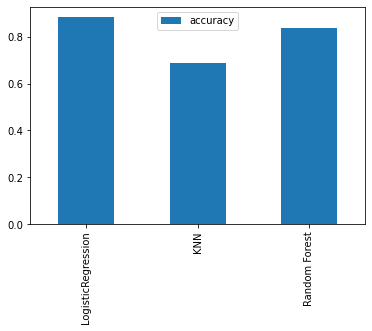

In [45]:
model_compare=pd.DataFrame(model_score, index=["accuracy"])
model_compare.T.plot.bar();

## Tuning and Improving our Model
Now we have baseline model, next is to see how we can improve it

Since it's an experimental phase let's look at the following:
- Hyperparameter tuning - Each model you use has a series of dials you can turn to dictate how they perform. Changing these values may increase or decrease model performance.
- Feature importance - If there are a large amount of features we're using to make predictions, do some have more importance than others? For example, for predicting heart disease, which is more important, sex or age?
- Confusion matrix - Compares the predicted values with the true values in a tabular way, if 100% correct, all values in the matrix will be top left to bottom right (diagnol line).
- Cross-validation - Splits your dataset into multiple parts and train and tests your model on each part and evaluates performance as an average.
- Precision - Proportion of true positives over total number of samples. Higher precision leads to less false positives.
- Recall - Proportion of true positives over total number of true positives and false negatives. Higher recall leads to less false negatives.
- F1 score - Combines precision and recall into one metric. 1 is best, 0 is worst.
- Classification report - Sklearn has a built-in function called classification_report() which returns some of the main classification metrics such as precision, recall and f1-score.
- ROC Curve - Receiver Operating Characterisitc is a plot of true positive rate versus false positive rate.
- Area Under Curve (AUC) - The area underneath the ROC curve. A perfect model achieves a score of 1.0.

## Hyperparameter Tuning

In [12]:
#lets tune KNN to see if we can improve it

train_scores=[]
test_scores=[]

#tuning n_neighbors; create a range of values for the parameter n_neighbors
neighbors = range(1,21)

#set up KNN 
knn=KNeighborsClassifier()

#loop through different range of neighbors
for i in neighbors:
    knn.set_params(n_neighbors=i)
    
    #fit the algorithm
    knn.fit(X_train,y_train)
    
    #update the training score list
    train_scores.append(knn.score(X_train,y_train))
    
    #update the score on the test score list
    test_scores.append(knn.score(X_test,y_test))
    
    

In [13]:
train_scores

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

In [14]:
test_scores

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

### Lets visualize it


The Max knn score is: 75.41%


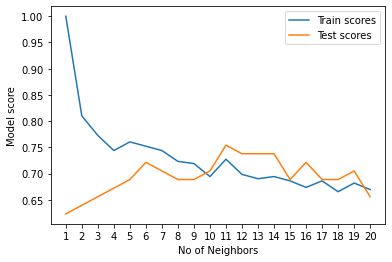

In [15]:
plt.plot(neighbors, train_scores, label="Train scores")
plt.plot(neighbors, test_scores, label="Test scores")
plt.xticks(np.arange(1,21,1))
plt.xlabel("No of Neighbors")
plt.ylabel("Model score")
plt.legend()

print(f"The Max knn score is: {max(test_scores)*100:.2F}%")

## Hyperparameter Tuning with Randomized Search CV
we are going to tune 
- LogisticRegression()
- RandomForestClassifier()

.... using RandomizedSearchCV

**The best KNN Score was 75.41% so its safe to abadon it and work with the other two model since they are relatively high**

In [16]:
#create a hyperparameter grid for logistic regression
log_reg_grid={"C":np.logspace(-4,4,20),
              "solver":["liblinear"]}

#create a hyperparameter grid for RandomForestClassifier
rf_grid={"n_estimators": np.arange(10,100,50),
         "max_depth": [None,3,5,10],
         "min_samples_leaf": np.arange(1,20,2)}


**Now we have our parameters set up, it is time to use RandomisedSearchCV() for our models**

In [17]:
#Tune the logistic Regression
np.random.seed(42)

#set up hyperparameter search for Logistic Regression
rs_log_reg=RandomizedSearchCV(LogisticRegression(),
                              param_distributions=log_reg_grid,
                              n_iter=20,
                              cv=5,
                              verbose=True)

#Fit the RandomizedSearchCV for the Logistic Regression Model

rs_log_reg.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [18]:
#Check best parameter
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [19]:
#evaluating the LogisticRegression Model
rs_log_reg.score(X_test,y_test)

print(f"The RandomizedSearchCV() result for logistic regression is:{rs_log_reg.score(X_test,y_test)*100:.2f}%")

The RandomizedSearchCV() result for logistic regression is:88.52%


In [20]:
model_score

{'LogisticRegression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

**We got the same score for the baseline and tuned prameters for Logistic Regression**

In [21]:
#Tuning for RandomForestClassifier
np.random.seed(42)

#set up parameter for RandomizedSearchCV() on RandomForestClassifier
rs_rf=RandomizedSearchCV(RandomForestClassifier(),
                         param_distributions=rf_grid,
                         n_iter=20,
                         cv=5,
                         verbose=True)

#fit the RandomizedSearchCV for the RandomForestClassifier
rs_rf.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'n_estimators': array([10, 60])},
                   verbose=True)

In [22]:
#Check the best parameter
rs_rf.best_params_

{'n_estimators': 10, 'min_samples_leaf': 11, 'max_depth': 10}

In [23]:
#Evaluate the score on the model
rs_rf.score(X_test,y_test)

0.8524590163934426

In [24]:
model_score

{'LogisticRegression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

**We can see a significant increase from the basline model score to the tuned score**

## Tuning with GridSearchCV()
- Since LogisticRegression() performed better than the RandomForestClasifier(), we'll try to see if we can improve it with GridSearchCV()

In [25]:
#parameters for LogisticRegression() with GridSearchCV
log_reg_grid={"C": np.logspace(-4,4,30),
              "solver": ["liblinear"]}

#setup grid hyperparameters 
gs_log_reg=GridSearchCV(LogisticRegression(),
                        param_grid=log_reg_grid,
                        cv=5,
                        verbose=True)

#Fit the model with GridSearchCv
gs_log_reg.fit(X_train,y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [26]:
#Check the best params
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [27]:
#Evaluate the score on the model
gs_log_reg.score(X_test,y_test)

0.8852459016393442

**Still we get the same result as that of the baseline model**

## Evaluating tuned machine learning classifier beyond accuracy
- ROC curve and AUC score
- Confusion Matrix
- Classification Report
- Precision
- Recall
- F1 score

.... and it would be nice if cross validation score would be nice if cross validation is used where possible

In [28]:
#make predictions with tuned model
y_preds=gs_log_reg.predict(X_test)

In [29]:
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [30]:
y_test

179    0
228    0
111    1
246    0
60     1
      ..
249    0
104    1
300    0
193    0
184    0
Name: target, Length: 61, dtype: int64

### ROC CURVE: ROC curve is created by plotting the true positive rate against the false positive rate


C:\Users\TU7WRE\Desktop\Sample_project_1\env\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


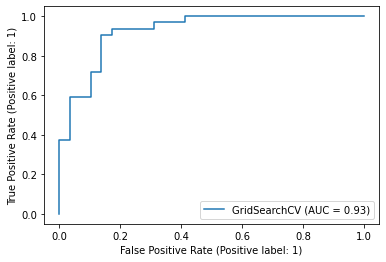

In [31]:
#plot ROCcurve and calculate AUC metric
plot_roc_curve(gs_log_reg, X_test, y_test);

In [32]:
#confusion matrix
print(confusion_matrix(y_test,y_preds))

[[25  4]
 [ 3 29]]


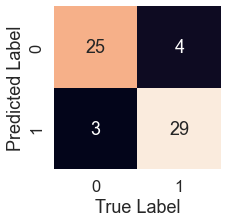

In [33]:
#visualize it with sns heatmap
sns.set(font_scale=1.5)

def plot_conf_mat(y_test,y_preds):
    """
    plot a nice looking confusion matrix using seaborns heatmap()
    """
    fig,ax=plt.subplots(figsize=(3,3))
    ax=sns.heatmap(confusion_matrix(y_test,y_preds),
                   annot=True,
                   cbar=False)
    plt.xlabel("True Label")
    plt.ylabel("Predicted Label")

plot_conf_mat(y_test,y_preds)

**Now we have ROC curve, AUCcurve and confusion matrix.Lets get  clssification report as well as cross validated score for precision, recall and f1**

In [34]:
#classification report
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



**This is calculated but not on a cross-validation test split**

## Calculating evaluation metrics using cross validation

We are going to calculate accuracy, precision,recall and f1 score of our model using cross alidation and to do so, we'll use cross_val_score

In [35]:
#check best params
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [36]:
#create a new classifier with best parameter
clf=LogisticRegression(C=0.20433597178569418,
                       solver="liblinear")

In [37]:
#cross validated accuracy
cv_acc=cross_val_score(clf,X,
                       y,
                       cv=5,
                       scoring="accuracy")
cv_acc=np.mean(cv_acc)
cv_acc

0.8446994535519124

In [38]:
#cross validated precision
cv_precision=cross_val_score(clf,X,
                             y,
                             cv=5,
                             scoring="precision")
cv_precision=np.mean(cv_precision)
cv_precision

0.8207936507936507

In [39]:
#cross validated recall
cv_recall=cross_val_score(clf,X,
                             y,
                             cv=5,
                             scoring="recall")
cv_recall=np.mean(cv_recall)
cv_recall

0.9212121212121213

In [40]:
#cross validated f1
cv_f1=cross_val_score(clf,X,
                             y,
                             cv=5,
                             scoring="f1")
cv_f1=np.mean(cv_f1)
cv_f1

0.8673007976269721

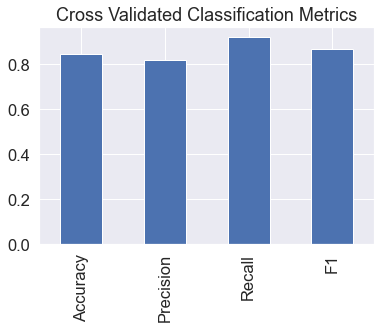

In [41]:
#visualize the cross validated score in a dataframe
cv_metrics=pd.DataFrame({"Accuracy": cv_acc,
                         "Precision": cv_precision,
                         "Recall": cv_recall,
                         "F1": cv_f1},index=[0])
cv_metrics.T.plot.bar(title="Cross Validated Classification Metrics", legend=False);

## Feature Importance
This is another way of asking; which features contributed most to the outcomes of the model and how did they contribute

Lets find the feature importance for our Logistic Regression model

In [43]:
#lets remind ourselves of our data
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [42]:
#fit an instance of Logisitic regression with best parameter
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [45]:
clf=LogisticRegression(C=0.20433597178569418,
                       solver="liblinear")

clf.fit(X_train,y_train)

LogisticRegression(C=0.20433597178569418, solver='liblinear')

In [46]:
#check coef_   (coefficient)
clf.coef_

array([[ 0.00316728, -0.86044651,  0.66067041, -0.01156993, -0.00166374,
         0.04386107,  0.31275847,  0.02459361, -0.6041308 , -0.56862804,
         0.45051628, -0.63609897, -0.67663373]])

In [47]:
#match coef_ of features to columns of dataframe
feature_dict=dict(zip(df.columns,list(clf.coef_[0])))
feature_dict

{'age': 0.0031672801993431563,
 'sex': -0.8604465072345515,
 'cp': 0.6606704082033799,
 'trestbps': -0.01156993168080875,
 'chol': -0.001663744504776871,
 'fbs': 0.043861071652469864,
 'restecg': 0.31275846822418324,
 'thalach': 0.024593613737779126,
 'exang': -0.6041308000615746,
 'oldpeak': -0.5686280368396555,
 'slope': 0.4505162797258308,
 'ca': -0.6360989676086223,
 'thal': -0.6766337263029825}

**This shows the contribution of the various columns of the features in predicting Heart Disease or not**

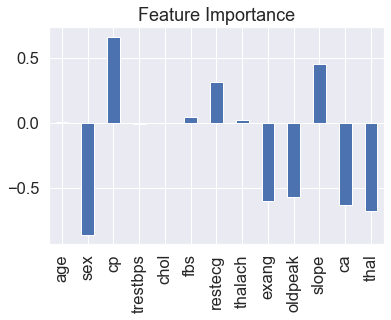

In [48]:
#visualize the feature importance
feature_df=pd.DataFrame(feature_dict,
                        index=[0])
feature_df.T.plot.bar(title="Feature Importance",
                      legend=False);

we can see the cp has the highest correlation to impact on Heart Disease

### lets check what slope is 
slope - the slope of the peak exercise ST segment
- 0: Upsloping: better heart rate with excercise (uncommon)
- 1: Flatsloping: minimal change (typical healthy heart)
- 2: Downslopins: signs of unhealthy heart

In [49]:
pd.crosstab(df.slope,df.target)

target,0,1
slope,,
0,12,9
1,91,49
2,35,107


**we can see that signs of unhealthy heart also aids in the Heart Disease prediction**

## Conclusion

Our Evaluation at the beginning of the project was to get 90% accuracy on our Classification using our Machine Learning Model.



**We were able to achieve this using the Recall metrics on cross validation with our Logistic Regression Model**

In [54]:
#Recall evaluation metrics
cv_recall=cross_val_score(clf,X,
                             y,
                             cv=5,
                             scoring="recall")
cv_recall=np.mean(cv_recall)
cv_recall

print(f"The Recall was able to predict:{cv_recall*100:.2f}% accuracy")

The Recall was able to predict:92.12% accuracy


**And this was done with Logistic Regression Model**

## Experimentations
If we haven't hit your evaluation metric yet... ask questions like...

- Could we collect more data?
- Could we try a better model? Like CatBoost or XGBoost?
- Could we improve the current models? (beyond what we've done so far)
- If your model is good enough (you have hit your evaluation metric) how would you export it and share it with others?